
I will be reviewing the data set to determine the best ouput from the following models. 

•  decision trees

•  random forests

•  advanced regression (i.e., lasso or ridge regression)

In [1]:
#### LOAD LIBRARIES
##### system
import sys, os

##### Data
import pandas as pd
import numpy as np
import seaborn as sns


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

###### analysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn import svm

##### VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# LOAD DATA
file = pd.read_csv('C://Users//msmorris//Desktop//Churn_example//churn_clean.csv')
file.head()

,CaseOrder,Customer_id,Interaction,UID,input_date,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,6/29/2021,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,2/10/2020,West Branch,MI,Ogemaw,48661,44.32893,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,9/6/2021,Yamhill,OR,Yamhill,97148,45.35589,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,5/30/2021,Del Mar,CA,San Diego,92014,32.96687,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,7/5/2021,Needville,TX,Fort Bend,77461,29.38012,...,149.948316,271.493436,4,4,4,3,4,4,4,5


 #### b) Remove blank spaces drop duplicates

In [3]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [4]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

# Drop Duplicates
file = file.drop_duplicates()

In [5]:
#### c) Ensure numeric data is in the correct format

In [6]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

In [7]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

In [8]:
file_null = file.isnull().any()
print(file_null)

CaseOrder                       False
Customer_id                     False
Interaction                     False
UID                             False
input_date                      False
City                            False
State                           False
County                          False
Zip                             False
Lat                             False
Lng                             False
Population                      False
Area                            False
TimeZone                        False
Job                             False
Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract    

In [9]:
file

,CaseOrder,Customer_id,Interaction,UID,input_date,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,6/29/2021,Point Baker,AK,Prince of Wales-Hyder,99927,56,...,172,904,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,2/10/2020,West Branch,MI,Ogemaw,48661,44,...,242,800,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,9/6/2021,Yamhill,OR,Yamhill,97148,45,...,159,2054,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,5/30/2021,Del Mar,CA,San Diego,92014,32,...,119,2164,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,7/5/2021,Needville,TX,Fort Bend,77461,29,...,149,271,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,2/2/2020,Mount Holly,VT,Rutland,5758,43,...,159,6511,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,10/3/2021,Clarksville,TN,Montgomery,37042,36,...,207,5695,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,1/31/2020,Mobeetie,TX,Wheeler,79061,35,...,169,4159,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,9/22/2020,Carrollton,GA,Carroll,30117,33,...,252,6468,4,4,6,4,3,3,5,4


In [10]:
file.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'input_date', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender',
       'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Evidence_of_active_listening'],
      dtype='object')

#### subset features of interest

Churn, Tenure, Techie, Bandwidth_GB_Year, StreamingMovies, StreamingTV, Outage_sec_perweek

In [11]:
df = file[['Churn', 'Tenure', 'Techie', 'Tablet','Bandwidth_GB_Year', 'StreamingMovies', 'StreamingTV', 'Outage_sec_perweek']]

In [12]:
df

,Churn,Tenure,Techie,Tablet,Bandwidth_GB_Year,StreamingMovies,StreamingTV,Outage_sec_perweek
0,No,6,No,Yes,904,Yes,No,7
1,Yes,1,Yes,Yes,800,Yes,Yes,11
2,No,15,Yes,No,2054,Yes,No,10
3,No,17,Yes,No,2164,No,Yes,14
4,Yes,1,No,No,271,No,Yes,8
...,...,...,...,...,...,...,...,...
9995,No,68,No,Yes,6511,No,No,9
9996,No,61,No,No,5695,No,Yes,6
9997,No,47,No,No,4159,No,No,6
9998,No,71,No,Yes,6468,Yes,Yes,12


In [13]:
# Categorical values group creation
obj = []
num = []
for col in df:
    if df[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)

Object list 
 ['Churn', 'Techie', 'Tablet', 'StreamingMovies', 'StreamingTV']


Numeric list 
 ['Tenure', 'Bandwidth_GB_Year', 'Outage_sec_perweek']


#### EDA

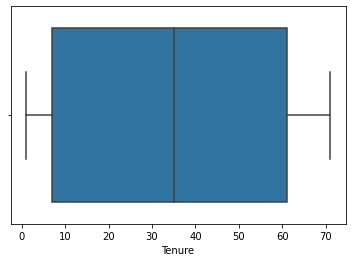

count    10000.00
mean        34.03
std         26.44
min          1.00
25%          7.00
50%         35.00
75%         61.00
max         71.00
Name: Tenure, dtype: float64


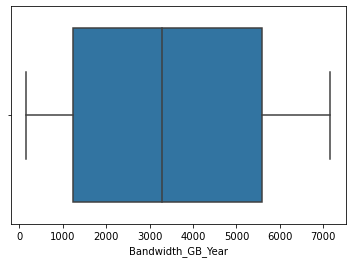

count    10000.00
mean      3391.84
std       2185.29
min        155.00
25%       1236.00
50%       3279.00
75%       5586.00
max       7158.00
Name: Bandwidth_GB_Year, dtype: float64


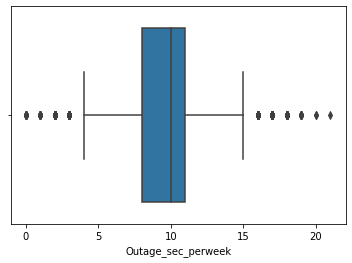

count    10000.00
mean         9.50
std          2.99
min          0.00
25%          8.00
50%         10.00
75%         11.00
max         21.00
Name: Outage_sec_perweek, dtype: float64


In [14]:
for column in num:
    plt.figure()    
    sns.boxplot(data = df, x = column)
    plt.show()
    print(df[column].describe().round(2).T)
    ;

<Figure size 432x288 with 0 Axes>

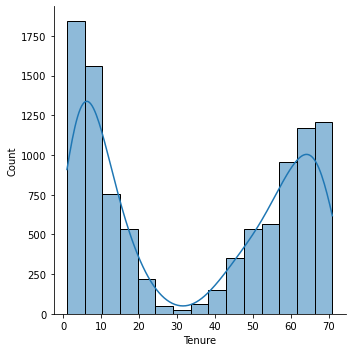

<Figure size 432x288 with 0 Axes>

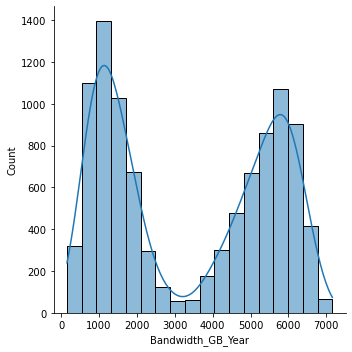

<Figure size 432x288 with 0 Axes>

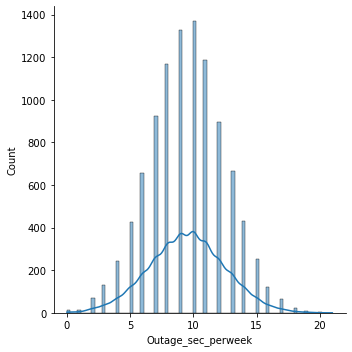

In [15]:
for column in num:
    plt.figure()    
    sns.displot(data = df, x =column, kde = True);

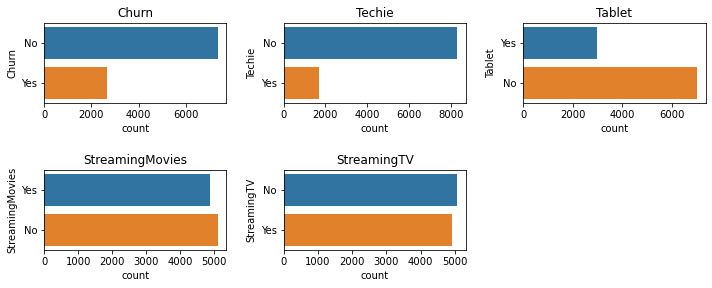

In [16]:
# count plot of categorical data
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(obj):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=df)
    plt.title(col)
    fig.tight_layout(h_pad=2, w_pad=2)

plt.savefig('countplot_cat_data.png', facecolor='w')

In [17]:
df

,Churn,Tenure,Techie,Tablet,Bandwidth_GB_Year,StreamingMovies,StreamingTV,Outage_sec_perweek
0,No,6,No,Yes,904,Yes,No,7
1,Yes,1,Yes,Yes,800,Yes,Yes,11
2,No,15,Yes,No,2054,Yes,No,10
3,No,17,Yes,No,2164,No,Yes,14
4,Yes,1,No,No,271,No,Yes,8
...,...,...,...,...,...,...,...,...
9995,No,68,No,Yes,6511,No,No,9
9996,No,61,No,No,5695,No,Yes,6
9997,No,47,No,No,4159,No,No,6
9998,No,71,No,Yes,6468,Yes,Yes,12


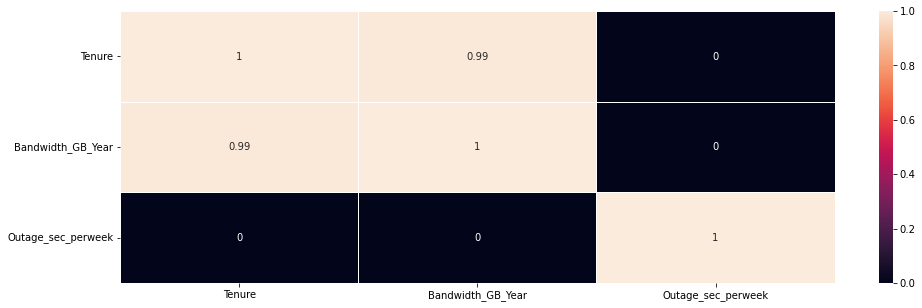

In [18]:
df_num= pd.DataFrame(df[num])

corrMatrix = df_num.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

#### re-encode features with 'Yes','No' results to Binary 1,0

In [19]:
df.columns

Index(['Churn', 'Tenure', 'Techie', 'Tablet', 'Bandwidth_GB_Year',
       'StreamingMovies', 'StreamingTV', 'Outage_sec_perweek'],
      dtype='object')

In [20]:
import warnings
warnings.simplefilter(action="ignore")
df['churn_dum'] = [1 if i == 'Yes' else 0 for i in df['Churn']]

df['Techie'] = [1 if i == 'Yes' else 0 for i in df['Techie']]
df['Tablet'] = [1 if i == 'Yes' else 0 for v in df['Tablet']]
df['StreamingMovies'] = [1 if i == 'Yes' else 0 for i in df['StreamingMovies']]
df['StreamingTV'] = [1 if i == 'Yes' else 0 for i in df['StreamingTV']]
df['Intercept'] = 1
df = df.drop(columns=['Churn'] )
df

,Tenure,Techie,Tablet,Bandwidth_GB_Year,StreamingMovies,StreamingTV,Outage_sec_perweek,churn_dum,Intercept
0,6,0,0,904,1,0,7,0,1
1,1,1,0,800,1,1,11,1,1
2,15,1,0,2054,1,0,10,0,1
3,17,1,0,2164,0,1,14,0,1
4,1,0,0,271,0,1,8,1,1
...,...,...,...,...,...,...,...,...,...
9995,68,0,0,6511,0,0,9,0,1
9996,61,0,0,5695,0,1,6,0,1
9997,47,0,0,4159,0,0,6,0,1
9998,71,0,0,6468,1,1,12,0,1


### 4.  Provide a copy of the cleaned data set.

In [21]:
df.to_csv("C:\\Users\\msmorris\\Desktop\\d209t2_pred.csv")

# Part IV: Analysis

## D.  Perform the data analysis and report on the results by doing the following:



### 1.  Split the data into training and test data sets and provide the file(s).



In [22]:
#measuring model performance
# Defining X and y
# Set X as data and y as Target
X = df.drop('churn_dum',axis=1)
y = df.churn_dum

In [23]:
# review X
X

,Tenure,Techie,Tablet,Bandwidth_GB_Year,StreamingMovies,StreamingTV,Outage_sec_perweek,Intercept
0,6,0,0,904,1,0,7,1
1,1,1,0,800,1,1,11,1
2,15,1,0,2054,1,0,10,1
3,17,1,0,2164,0,1,14,1
4,1,0,0,271,0,1,8,1
...,...,...,...,...,...,...,...,...
9995,68,0,0,6511,0,0,9,1
9996,61,0,0,5695,0,1,6,1
9997,47,0,0,4159,0,0,6,1
9998,71,0,0,6468,1,1,12,1


In [24]:
# Review Y
y

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: churn_dum, Length: 10000, dtype: int64

In [26]:
# Run test train split with test size of .3
# set stratify to y to ensure balance samples 
# Setting random state to 42 to ensure same values in test train split on reruns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state= 42)

In [28]:
X_train.to_csv("C:\\Users\\msmorris\\Desktop\\d209t2_X_train.csv")
X_test.to_csv("C:\\Users\\msmorris\\Desktop\\d209t2_X_test.csv")
y_train.to_csv("C:\\Users\\msmorris\\Desktop\\d209t2_y_train.csv")
y_test.to_csv("C:\\Users\\msmorris\\Desktop\\d209t2_y_test.csv")

### 2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

Analysis technique used for this review will be random forest. Random forest is a classification technique using several decisions trees. It uses bagging or bootstrapping or more simply put taking several random samples using replacement to infer the population. 

The goal of this is to create an uncorrelated "forest" of decision trees to predict using  multiple layers rather than  as single decision tree. RMSE or finally evaluate the test set with classifcation report, RMSE, ROC and AUC.

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.871845006346354

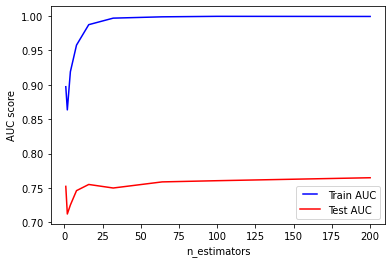

In [41]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)   
   
   train_pred = rf.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = rf.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# 16 trees

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#insatiate the model
rf = RandomForestRegressor(n_estimators=16, min_samples_leaf=0.12, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)



In [47]:
#RMSE of model
from sklearn.metrics import mean_squared_error as MSE
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.35


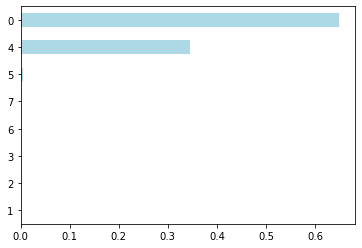

In [51]:
#feature importance
import pandas as pd
import matplotlib.pyplot as plt
importances_rf = pd.Series(rf.feature_importances_)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightblue'); plt.show()

In [52]:
for i, item in enumerate(rf.feature_importances_):
    print('{0:s}: {1:.2f}'.format(df.columns[i], item))



Tenure: 0.65
Techie: 0.00
Tablet: 0.00
Bandwidth_GB_Year: 0.00
StreamingMovies: 0.35
StreamingTV: 0.00
Outage_sec_perweek: 0.00
churn_dum: 0.00


In [53]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 16,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
#accuracy of train and test data with MAE(Mean Absolute Error)
rf.fit(X_train, y_train)
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error as MAE
train_error = MAE(y_true=y_train, y_pred=train_predictions)
test_error = MAE(y_true=y_test, y_pred=test_predictions)



In [57]:
print('Model error on seen data: {0:.2f}.'.format(train_error))
print('Model error on unsseen data: {0:.2f}.'.format(test_error))

Model error on seen data: 0.26.
Model error on unsseen data: 0.26.


MSE represents the mean squared errors. This metric allows for large errors to have a large impacts on the model. This tells us the accuracy of the model by determining distance from the data to the regression even with outliers affecting it. A lower MSE is interpreted as the  model is closer to the regression. 

In [58]:
#cross validation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [59]:
rf = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=1111)
mse= make_scorer(mean_squared_error)

In [60]:
cv_results = cross_val_score(rf, X, y, cv=5, scoring=mse)
print(cv_results)

[0.17467388 0.17760368 0.10964037 0.042032   0.0450008 ]


In [61]:
print(MSE(y_test, y_pred))

0.12563630816314297


In [62]:
#GridSearch cross validation
from sklearn.model_selection import GridSearchCV
SEED=1
rf= RandomForestRegressor(random_state=SEED)

In [63]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [64]:
params_rf = {'n_estimators': [300, 400, 3000],
            'max_depth': [4, 6, 8],
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']}

In [65]:
rf_cv = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1, 
                      n_jobs=-1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 3000]},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
print('Best score for this Random Forest Regressor model: {:.3f}'.format(rf_cv.best_score_))

Best score for this Random Forest Regressor model: -0.130


In [67]:
best_hyperparams = rf_cv.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


In [68]:
#evaluating the best model performance
best_model = rf_cv.best_estimator_
y_pred= best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.36
